# bitcoin-historical-data

Use the "Run" button to execute the code.

# Bitcoin Historical Data Analysis

In [1]:
pip install opendatasets --upgrade --q

## Data Download





In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushkumar10
Your Kaggle Key: ··········


100%|██████████| 100M/100M [00:00<00:00, 112MB/s]  


In [3]:
data_filename = '/content/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

## Data Preparation and Cleaning
1. Load file using pandas
2. view the files
3. Fix any incorrect and missing values
  - renamed Volume_(BTC) to Volume_BTC
  - renamed Volume_(Currency) to Volume_Currency


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Renaming Columns here

In [7]:
df.rename(columns = {'Volume_(BTC)': 'Volume_BTC'}, inplace = True )
df.rename(columns = {'Volume_(Currency)': 'Volume_Currency'}, inplace = True )

In [8]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price'],
      dtype='object')

In [9]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price'],
      dtype='object')

In [10]:
len(df.columns)

8

In [11]:
len(df)

4857377

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Timestamp        int64  
 1   Open             float64
 2   High             float64
 3   Low              float64
 4   Close            float64
 5   Volume_BTC       float64
 6   Volume_Currency  float64
 7   Weighted_Price   float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [13]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


<Axes: title={'center': 'Bitcoin Historical Data'}>

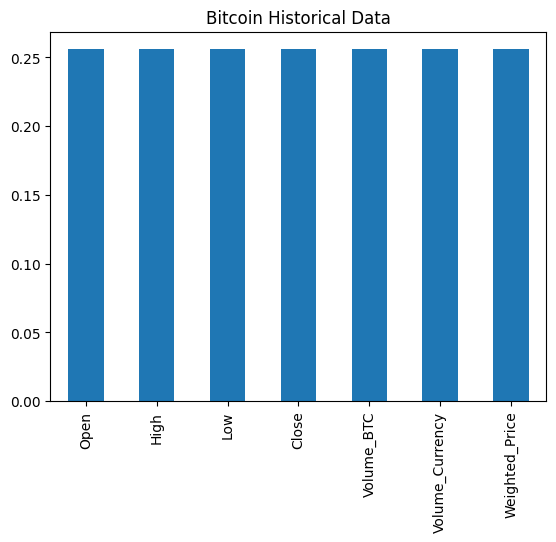

In [14]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages[missing_percentages != 0].plot(kind='bar', title='Bitcoin Historical Data')

Percentage of missing values per column

To remove columns that you don't want to use use
df.drop()

In [15]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_Currency', 'Weighted_Price'],
      dtype='object')

In [16]:
missing_percentages[missing_percentages != 0]

Open               0.256025
High               0.256025
Low                0.256025
Close              0.256025
Volume_BTC         0.256025
Volume_Currency    0.256025
Weighted_Price     0.256025
dtype: float64

# Exploratory Analysis Section

Columns to analyze

1. Volume(BTC)
2. Open
3. Close
4. High

In [17]:
len(df.Close)

4857377

In [18]:
df.Close.sort_values(ascending=False)

4832697    61781.80
4832699    61726.87
4832698    61719.74
4832696    61719.59
4832718    61697.89
             ...   
4856245         NaN
4856308         NaN
4856376         NaN
4857340         NaN
4857368         NaN
Name: Close, Length: 4857377, dtype: float64

In [19]:
df.High

0              4.39
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    58714.31
4857373    58693.43
4857374    58723.84
4857375    58770.38
4857376    58778.18
Name: High, Length: 4857377, dtype: float64

In [20]:
df.Open

0              4.39
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 4857377, dtype: float64

In [21]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: >

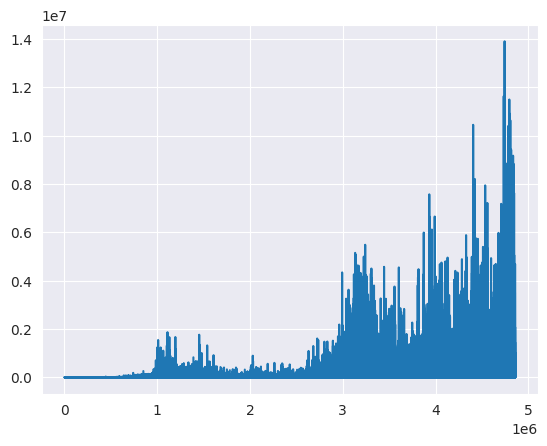

In [22]:
df.Volume_Currency.plot()

<Axes: >

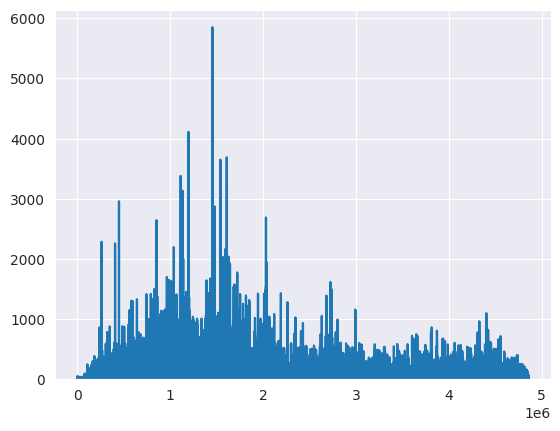

In [23]:
df.Volume_BTC.plot(kind='area')

<Axes: xlabel='Open', ylabel='Count'>

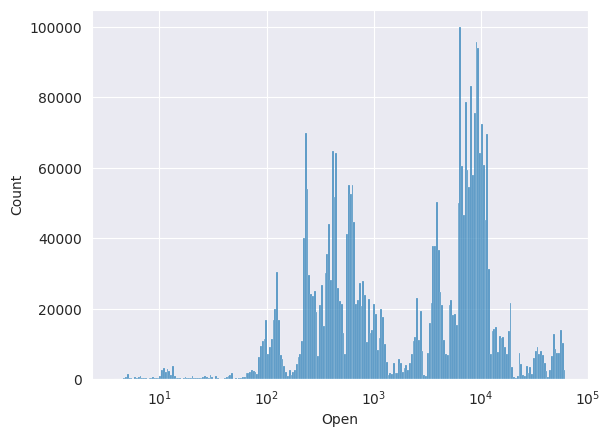

In [24]:
sns.histplot(df.Open, log_scale=True)

<Axes: xlabel='Close', ylabel='Count'>

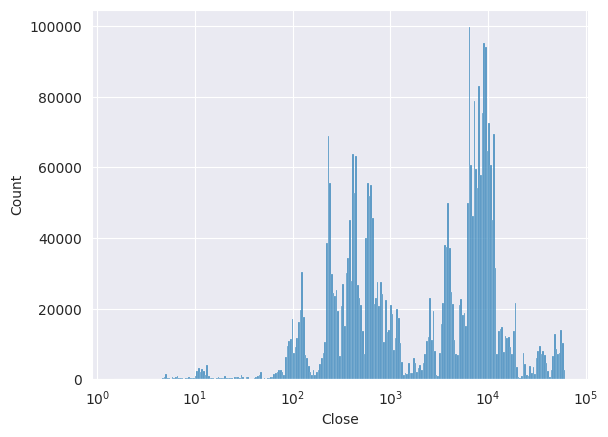

In [25]:
sns.histplot(df.Close, log_scale=True)

### Diff between high and low price in btc

In [27]:
df['Diff_High_Low'] = df['High'] - df['Low']
df

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,Diff_High_Low
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,28.31
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,9.46
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,30.41
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,28.20


### Highest Closing price list

In [28]:
df1 = df.Close.sort_values(ascending=False)
df1

4832697    61781.80
4832699    61726.87
4832698    61719.74
4832696    61719.59
4832718    61697.89
             ...   
4856245         NaN
4856308         NaN
4856376         NaN
4857340         NaN
4857368         NaN
Name: Close, Length: 4857377, dtype: float64

### Highest Opening price list

In [29]:
df2 = df.Open.sort_values(ascending=False)
df2

4832698    61763.56
4832697    61733.94
4832699    61722.00
4832700    61698.52
4832703    61691.72
             ...   
4856245         NaN
4856308         NaN
4856376         NaN
4857340         NaN
4857368         NaN
Name: Open, Length: 4857377, dtype: float64

## Ask Questions
1. what is the diff betwwen high and low
2. Highest closing price list
3. Highest Opening price list
4. why does every column has the same no. of null data except timestamps

1. Added another column for that
2. made a new data frame for that
3. made a new data frame for that
4.

# Summary and Conclusions

Insights:
  1. Each of the data columns have same no. of null data
  2. BTC volume in trading has decreased a lot as its value in currency has increased
  3. Currency price of BTC increases exponentially
  4.  